### Data Preprocessing

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [25]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [36]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
stopwords_en = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [37]:
def clean_text(text,remove_stopwords=True):
    
    # -- Converting to lower case
    text = text.lower()
    
    # replacing english abbreviations with full forms
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    
    if(remove_stopwords):
        # -- Lemmatization and segmentation
        filtered_sent = []
        sent = nltk.word_tokenize(text) #word tokenizing
        for i in sent:
            # -- Removing stopwords
            if i not in stopwords_en:
                filtered_sent.append(lemmatizer.lemmatize(i))
        text = ','.join(filtered_sent)
    
    # -- Removing numbers
    retokenizer1 = RegexpTokenizer(r'\D+') #remove numerical values
    text = ','.join(retokenizer1.tokenize(text))
    
    # -- Removing punctuations
    retokenizer2 = RegexpTokenizer(r'\w+') #remove numerical values
    text = ' '.join(retokenizer2.tokenize(text))
    
    """
    print(text)
    # -- Removing non-English words
    sent = text.split(',')
    english_word = []
    for w in sent:
        if(len(w)>2) and detect(w)=='en':
            #this is an english word
            english_word.append(w)
            print(w)
    text = ' '.join(english_word)
    #print(english_word)
    """
    
    return text

In [38]:
print(clean_text(df['comment_text'][0], remove_stopwords=False))

explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now


##### Cleaning the comments

In [39]:
df['comment_text'] = df['comment_text'].map(lambda txt : clean_text(txt, remove_stopwords=False))

In [40]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can not make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


##### Checking correlation between various label properties

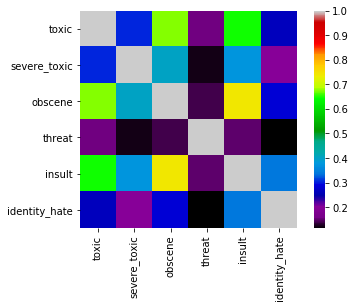

In [41]:
sns.heatmap(df.corr(), square=True, cmap='nipy_spectral')
plt.show()

> Nothing significant found ! :(

In [42]:
df.to_pickle('cleaned_data.pkl')